In [1]:
import pandas as pd
import numpy as np

diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv')

One important part of EDA is the identification of correlations between the independent and dependent features, and covariance between independent features in the dataset. A method that can be used to achieve this is the production of correlation matrix, in a either a non-graphical or graphical format. An issue that we face, however, is the presence of categorical features within the data, which will inhibit the production of a correlation matrix. Fortunately, the features in question (“cut”, “color” and “clarity”) are ordinal, meaning that they have a natural order, and can therefore be coded as natural numbers. By default, they should be stored as factors, but we will convert themto integers.

Whenever this form of transformation is applied, it is essential that the data is investigated thoroughly, and appropriate domain knowledge utilised, to ensure that there are no unintended consequences. For example, when performing correlation analysis, we need to the directionality of all the feature to be the same (i.e. “carat” becomes a ‘better’ value as it rises, as does price). Using the *diamonds.describe()* function to examine the data, it can be seen that the level order for the factors of “cut” and “clarity” possess this appropriate directionality, where the lower levels correspond with a less desirable category. 

*However, this directionality is reversed for the feature “color”, where the lowerlevels correspond to a more desirable trait (i.e. less colour contamination).*

In [2]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [3]:
diamonds['color'].describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [4]:
diamonds['color'] = diamonds['color'].astype('category')
diamonds['color'] = diamonds['color'].cat.codes
diamonds.describe()

,carat,color,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.594197,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.701105,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds['color'].describe()

count    53940.000000
mean         2.594197
std          1.701105
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: color, dtype: float64

In [6]:
diamonds['clarity'] = diamonds['clarity'].astype('category')
diamonds['clarity'] = diamonds['clarity'].cat.codes
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds['cut'] = diamonds['cut'].cat.codes
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


To create a correlation matrix, showing the Pearson correlation coefficients between the features, we can use the corr function of the Pandas dataframe.

In [8]:
corr = diamonds.corr(method= 'pearson')
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Notice that the “method” parameter allows for the measure of correlation to be set. While the correlation matrix that is printed to the console illustrates those raw figures, it does not present the best platform for the identification of patterns and trends. For that, a more graphical approach should be employed. A useful package that provides this functionality is statistical data visualization (seaborn) and matplotlib

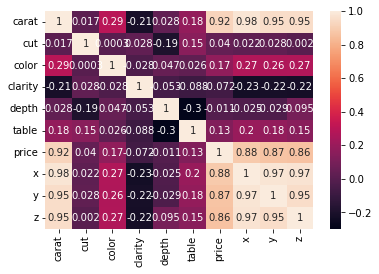

In [10]:
import seaborn as sns
import matplotlib as plt
heatmap = sns.heatmap(corr, annot=True)

The values inside the cells represents the correlation coefficients between each pair of features and the significance of each. A strong positive correlation is generally given to be any coefficient value of greater than 0.6 (and likewise, a strong negative coefficient can be considered to be any value lower than - 0.6). The corresponding correlation coefficient for carat and price is indicated by the ‘new colonial yellow’ box, on the figure above.

The final graphical EDA method that we will explore today is the quantile-normal plot. This plot is used to detect how close to approximating a normal distribution the data within a particular feature are, and hence act as a guide to whether certain assumptions have been met, and which techniques are available for use.

In [11]:
from seaborn_qqplot import pplot

ModuleNotFoundError: No module named 'seaborn_qqplot'

I don't know why, but I was unable to locate seaborn_qqplot (i use conda) 

!pip install seaborn_qqplot
from seaborn_qqplot import pplot
from scipy.stats import gamma
pplot(diamonds, x="depth", y=gamma, kind='qq', height=4, aspect=2, display_kws={"identity":True})